In [1]:
import sys
sys.path.append('..')
from osp import *

In [23]:
# df_meta = get_corpus_metadata()
# df_meta

In [26]:
# pprint(' '.join(get_non_content_words()))

In [28]:
words = get_non_content_words()
# words = ['hence','therefore','thus','insofar','because', 'after','before']
data = get_counts_wordset(words)
data

,the,of,more,an,than,but,for,him,as,his,...,somewheres,skywards,meself,yuk,northwestward,yippee,northeastward,southeastward,some-where,your-self
id,,,,,,,,,,,,,,,,,,,,,
phil/10.2307/2375809,0.165778,0.109275,0.004264,0.010661,0.006397,0.018124,0.022388,0.011194,0.017058,0.031983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/45238188,0.103907,0.085619,0.004988,0.013023,0.007204,0.012746,0.022721,0.000554,0.016902,0.004156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/20115538,0.142105,0.105263,0.006767,0.012782,0.000752,0.009774,0.023308,0.000000,0.014286,0.003008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/40380502,0.118147,0.094773,0.011900,0.013175,0.009350,0.010625,0.026774,0.000000,0.028899,0.000425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/24659549,0.155544,0.123432,0.001505,0.016056,0.006021,0.009032,0.014551,0.001505,0.021074,0.002007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lit/2872592,0.148089,0.101831,0.007388,0.009958,0.005461,0.010922,0.012207,0.005461,0.018953,0.016383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/42964393,0.040230,0.011494,0.000000,0.034483,0.005747,0.005747,0.000000,0.000000,0.011494,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phil/10.2307/27293693,0.146286,0.094857,0.006286,0.022286,0.000571,0.004000,0.017714,0.000000,0.013143,0.001714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def iter_pairwise_samples(data, colname='period',data_meta=None,balance=True, sample_size=None):
    data_meta = get_corpus_metadata() if data_meta is None else data_meta
    min_grp_size = min(data_meta.groupby(colname).size())
    data_meta = data_meta.groupby(colname).sample(n=min_grp_size)
    data_smpl = data.sample(frac=1)

    coltypes = data_meta[colname].unique()
    for coltype1 in coltypes:
        for coltype2 in coltypes:
            if coltype1 >= coltype2:
                continue
            df_meta_yes = data_meta.query(f'{colname}==@coltype1')
            df_meta_no = data_meta.query(f'{colname}==@coltype2')
                
            data_smpl_yes = data_smpl.loc[[i for i in df_meta_yes.index if i in data.index]].assign(_target=coltype1)
            data_smpl_no = data_smpl.loc[[i for i in df_meta_no.index if i in data.index]].assign(_target=coltype2)

            if balance:
                if sample_size is None:
                    minsize = min(data_smpl_yes.shape[0],data_smpl_no.shape[0])
                    data_smpl_yes = data_smpl_yes.sample(n=minsize)
                    data_smpl_no = data_smpl_no.sample(n=minsize)
                else:
                    data_smpl_yes = data_smpl_yes.sample(n=sample_size, replace=True)
                    data_smpl_no = data_smpl_no.sample(n=sample_size, replace=True)
            yield (coltype1, coltype2), pd.concat([data_smpl_yes,data_smpl_no]).sample(frac=1)


In [30]:
def classify_pairwise_samples(data, colname='period',data_meta=None,balance=True, sample_size=None):
    iterr = iter_pairwise_samples(data,colname=colname,data_meta=data_meta,balance=balance, sample_size=sample_size)

    out_preds = []
    out_feats = []
    for g,gfx in tqdm(list(iterr),desc='classifying'):
        meta = {'test_group': ' vs. '.join(g) if isinstance(g,(list,tuple)) else g, 'test_group_type': colname}
        gdf_preds, gdf_feats = classify_data(gfx)
        out_preds.append(gdf_preds.assign(**meta))
        out_feats.append(gdf_feats.assign(**meta))
    odf_preds, odf_feats = pd.concat(out_preds), pd.concat(out_feats)
    odf_preds.sort_values('accuracy',ascending=False,inplace=True)
    odf_feats.sort_values('weight',ascending=False,inplace=True)
    return odf_preds, odf_feats


In [31]:
df_meta = get_corpus_metadata()
df_meta_lit = df_meta.query('discipline == "Literature"')
df_meta_phil = df_meta.query('discipline == "Philosophy"')

In [67]:
df_preds, df_feats = classify_pairwise_samples(data, 'period_discipline', data_meta=df_meta, sample_size=1000)

classifying:   0%|          | 0/15 [00:04<?, ?it/s]


KeyboardInterrupt: 

In [61]:
df_feats.head(25)

,feature,weight,test_group,test_group_type
211,insofar,2.849461,eC20 Philosophy vs. lC20 Philosophy,halfcentury_discipline
194,within,2.798029,eC20 Literature vs. eC21 Literature,halfcentury_discipline
49,former,2.792924,eC21 Literature vs. eC21 Philosophy,halfcentury_discipline
194,within,2.692469,eC20 Literature vs. lC20 Literature,halfcentury_discipline
70,towards,2.269025,eC20 Literature vs. eC21 Literature,halfcentury_discipline
244,toward,2.240537,eC21 Literature vs. lC20 Literature,halfcentury_discipline
40,terms,2.208389,eC20 Literature vs. lC20 Philosophy,halfcentury_discipline
218,around,2.208196,eC20 Literature vs. lC20 Literature,halfcentury_discipline
48,about,2.140167,eC20 Literature vs. eC21 Literature,halfcentury_discipline
124,how,2.121624,eC20 Philosophy vs. eC21 Philosophy,halfcentury_discipline


In [62]:
df_preds.groupby(['test_label']).mean(numeric_only=True).sort_values('accuracy',ascending=False)

,confidence,correct,accuracy
test_label,,,
eC20 Literature / eC21 Philosophy,0.977658,0.9760,0.9760
eC20 Philosophy / eC21 Philosophy,0.956028,0.9620,0.9620
eC20 Philosophy / eC21 Literature,0.954323,0.9560,0.9560
eC21 Philosophy / lC20 Literature,0.952355,0.9550,0.9550
eC20 Literature / eC21 Literature,0.938361,0.9500,0.9500
eC20 Literature / lC20 Philosophy,0.941809,0.9480,0.9480
eC21 Literature / eC21 Philosophy,0.945988,0.9465,0.9465
eC21 Literature / lC20 Philosophy,0.936958,0.9385,0.9385
eC20 Literature / eC20 Philosophy,0.922907,0.9205,0.9205


In [63]:
df_preds_sum = df_preds.groupby(['test_label']).mean(numeric_only=True).sort_values('accuracy',ascending=False)
df_preds_sum

,confidence,correct,accuracy
test_label,,,
eC20 Literature / eC21 Philosophy,0.977658,0.9760,0.9760
eC20 Philosophy / eC21 Philosophy,0.956028,0.9620,0.9620
eC20 Philosophy / eC21 Literature,0.954323,0.9560,0.9560
eC21 Philosophy / lC20 Literature,0.952355,0.9550,0.9550
eC20 Literature / eC21 Literature,0.938361,0.9500,0.9500
eC20 Literature / lC20 Philosophy,0.941809,0.9480,0.9480
eC21 Literature / eC21 Philosophy,0.945988,0.9465,0.9465
eC21 Literature / lC20 Philosophy,0.936958,0.9385,0.9385
eC20 Literature / eC20 Philosophy,0.922907,0.9205,0.9205


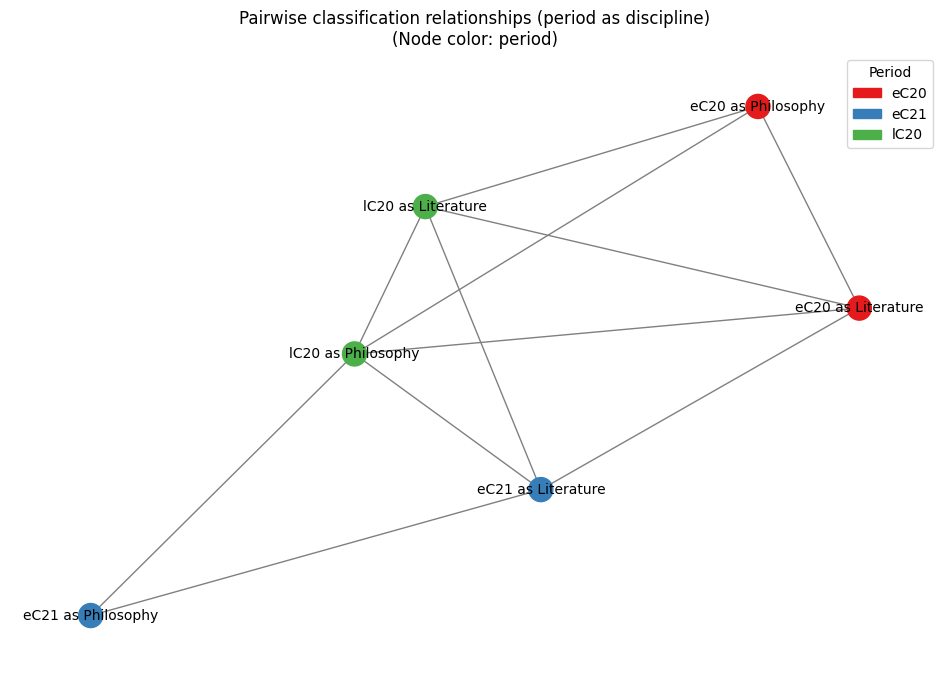

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
x = ' / '
cutoff = .95

# For more readable node labels: "period as discipline"
def make_label(period, discipline):
    return f"{period} as {discipline}"

# First, build the graph and collect periods for each node
node_periods = {}

for i, row in df_preds_sum.iterrows():
    a, b = i.split(x)
    a1, a2 = a.split(' ')
    b1, b2 = b.split(' ')
    label_a = make_label(a1, a2)
    label_b = make_label(b1, b2)
    # Store period for node coloring
    node_periods[label_a] = a1
    node_periods[label_b] = b1
    if row['accuracy'] > cutoff:
        continue
    G.add_edge(label_a, label_b, weight=row['accuracy'])

# Create a color map for periods
periods = sorted({period for period in node_periods.values()})
color_map = dict(zip(periods, plt.cm.Set1.colors[:len(periods)]))

# Assign colors to nodes based on period
node_colors = [color_map[node_periods[node]] for node in G.nodes()]

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(12, 8))
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Pairwise classification relationships (period as discipline)\n(Node color: period)")
# Custom legend for periods
from matplotlib.patches import Patch
handles = [Patch(color=color_map[period], label=period) for period in periods]
plt.legend(handles=handles, title="Period")
plt.axis("off")
plt.show()

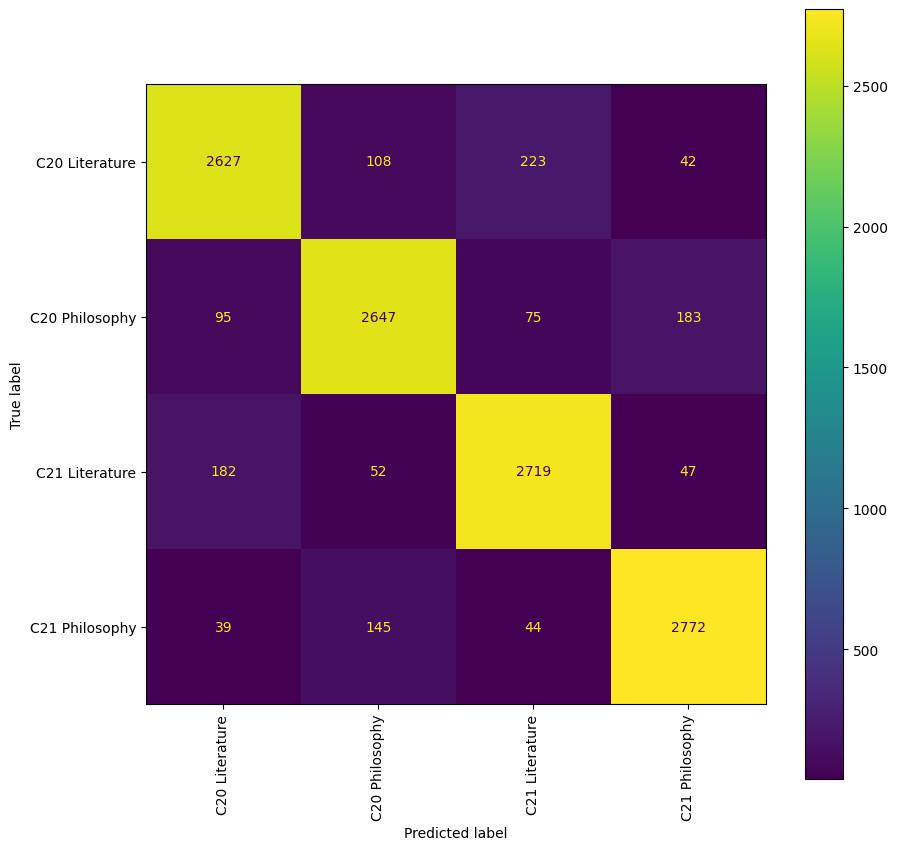

In [ ]:
# # df_preds
# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# ConfusionMatrixDisplay.from_predictions(df_preds['true_label'], df_preds['pred_label'], ax=ax, xticks_rotation='vertical')
# plt.show()

In [ ]:
df_feats